#Implementing VGG Model
- Load the train and test data from previously loaded and picked data - about 15,000 records
- Create a model with VGG16 using imagenet weights
- Enable Full Transfer learning
- Try full and partial learning by unfreezing layers and making layer.trainble = True
- Configure appropriate Hyperparameters and tune them better results
- Run as many epochs to improve the model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow
import keras
import seaborn as sns
from sklearn import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Load Data
tr_x = "/content/drive/My Drive/TrainData/CopyNtrainX_n.npy"
tr_y = "/content/drive/My Drive/TrainData/CopyNtrainY_n.npy"
t_x = "/content/drive/My Drive/TrainData/CopyNtestX_n.npy"
t_y = "/content/drive/My Drive/TrainData/CopyNtestY_n.npy"


file = open(tr_x, 'rb')
trainX = np.load(file)
file.close()
print("Loaded",tr_x)

file = open(tr_y, 'rb')
trainY = np.load(file)
file.close()
print("Loaded",tr_y)

file = open(t_x, 'rb')
testX = np.load(file)
file.close()
print("Loaded",t_x)

file = open(t_y, 'rb')
testY = np.load(file)
file.close()
print("Loaded",t_y)


Loaded /content/drive/My Drive/TrainData/CopyNtrainX_n.npy
Loaded /content/drive/My Drive/TrainData/CopyNtrainY_n.npy
Loaded /content/drive/My Drive/TrainData/CopyNtestX_n.npy
Loaded /content/drive/My Drive/TrainData/CopyNtestY_n.npy


In [ ]:
#hyper params
INIT_LR = .0001
EPOCHS = 50
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
metrics = ["accuracy"]

In [ ]:
VGG16_base_model = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = VGG16_base_model.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

VGG16Model = Model(inputs=VGG16_base_model.input, outputs=headModel)

for layer in VGG16_base_model.layers:
    layer.trainable = False

VGG16Model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

VGG16Model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
VGG16Model.fit(trainX,trainY,epochs=EPOCHS,batch_size=BS,validation_data=(testX, testY))

Epoch 1/50
300/300 [==============================] - 31s 103ms/step - loss: 0.5762 - accuracy: 0.7070 - val_loss: 0.5174 - val_accuracy: 0.7525
Epoch 2/50
300/300 [==============================] - 31s 102ms/step - loss: 0.5281 - accuracy: 0.7449 - val_loss: 0.5128 - val_accuracy: 0.7504
Epoch 3/50
300/300 [==============================] - 31s 102ms/step - loss: 0.5167 - accuracy: 0.7518 - val_loss: 0.5048 - val_accuracy: 0.7525
Epoch 4/50
300/300 [==============================] - 31s 102ms/step - loss: 0.5068 - accuracy: 0.7564 - val_loss: 0.5119 - val_accuracy: 0.7513
Epoch 5/50
300/300 [==============================] - 31s 102ms/step - loss: 0.5009 - accuracy: 0.7644 - val_loss: 0.5168 - val_accuracy: 0.7487
Epoch 6/50
300/300 [==============================] - 30s 101ms/step - loss: 0.4907 - accuracy: 0.7642 - val_loss: 0.4964 - val_accuracy: 0.7575
Epoch 7/50
300/300 [==============================] - 30s 102ms/step - loss: 0.4873 - accuracy: 0.7682 - val_loss: 0.4974 - val_ac

In [ ]:
y_predict = VGG16Model.predict(testX)
y_predict = np.argmax(y_predict, axis=1)

In [ ]:
#metrics.classification_report
cm=metrics.confusion_matrix(testY, y_predict, labels=[0, 1])
print("Confusion Matrics:")
cm

Confusion Matrics:


array([[898, 302],
       [272, 928]])

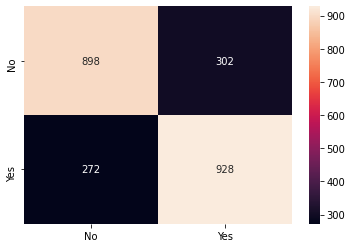

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
VGG16Model.save('/content/drive/My Drive/CAPSTONE-PROJECT/dev/VGG16Model')


INFO:tensorflow:Assets written to: /content/drive/My Drive/TrainData/VGG16Model/assets


#Summary
- The Model has trained well with good Train and validation accuracy
- Tuned various hyper parameters and set them at the optimum levels
- Tried partial learning and full learning, did not see any major improvement, so retained as trainable=False.
- Ran for 10-20-30-40-50 epochs
- The Model has shown 86% Training accuracy and 76% Validation data Accuracy
- The model has shown 272/1200 of False Negatives
- Displayed Classification report and Confusion matrix to check the performance of the model
- Saved the model 
- Loaded the model and checked if working fine
